In [2]:
# Load libraries
import pandas as pd

In [3]:
# Load dataframe into environment
IMDb_dataframe = pd.read_csv('/work/NLP/NLP_IMDb_Exam/Data/review_dataframe.csv')
IMDb_dataframe[IMDb_dataframe['movie_title'] == "2001_ A Space Odyssey"]

,movie_title,year,rating,title,review,average_rating
9064,2001_ A Space Odyssey,1968,10,Legendary\n,"A stand-alone monument in cinema history, Stan...",8.3
9065,2001_ A Space Odyssey,1968,10,Unmatched accomplishment\n,Sometimes reading the user comments on IMDB fi...,8.3
9066,2001_ A Space Odyssey,1968,10,"My god, it's full of stars\n",For all those bewildered by the length and pac...,8.3
9067,2001_ A Space Odyssey,1968,7,Ahead of its time but...\n,I felt the need to review this movie after rea...,8.3
9068,2001_ A Space Odyssey,1968,10,A film of monolithic proportions.\n,A review I have put off for far too long....<b...,8.3
...,...,...,...,...,...,...
11162,2001_ A Space Odyssey,1968,10,one of the best movies - ever\n,i saw the movie for the first time last tuesda...,8.3
11163,2001_ A Space Odyssey,1968,Null,quite beautiful for it's time\n,In 1968 I would have been enthralled by the vi...,8.3
11164,2001_ A Space Odyssey,1968,Null,Dynamic!\n,I truly appreciate this film for its lack of d...,8.3
11165,2001_ A Space Odyssey,1968,8,A visually stunning film.\n,Kubrick was one the greatest directors the 20t...,8.3


In [4]:
print(f"Total amount of 'Null'-ratings: {sum(IMDb_dataframe['rating']=="Null")}")
IMDb_dataframe = IMDb_dataframe[IMDb_dataframe['rating'] != "Null"]



Total amount of 'Null'-ratings: 95963


In [5]:
IMDb_dataframe['average_rating'].iloc[8450:8500]

9035    5.8
9036    5.8
9037    5.8
9038    5.8
9039    5.8
9040    5.8
9041    5.8
9042    5.8
9043    5.8
9044    5.8
9045    5.8
9047    5.8
9049    5.8
9051    5.8
9052    5.8
9054    5.8
9056    5.8
9057    5.8
9064    8.3
9065    8.3
9066    8.3
9067    8.3
9068    8.3
9069    8.3
9070    8.3
9072    8.3
9073    8.3
9074    8.3
9075    8.3
9076    8.3
9077    8.3
9078    8.3
9079    8.3
9081    8.3
9082    8.3
9083    8.3
9084    8.3
9085    8.3
9086    8.3
9087    8.3
9088    8.3
9089    8.3
9090    8.3
9091    8.3
9092    8.3
9093    8.3
9094    8.3
9095    8.3
9096    8.3
9097    8.3
Name: average_rating, dtype: float64

In [6]:
# Find a way to plot distributions of average_rating and infered rating. Also plot difference.
Movie_name = "Zulu"
IMDb_dataframe["rating"] = pd.to_numeric(IMDb_dataframe["rating"], errors="coerce")
Movie_rating = IMDb_dataframe[IMDb_dataframe['movie_title'] == Movie_name]["rating"]
Movie_rating = IMDb_dataframe[IMDb_dataframe['movie_title'] == Movie_name]["rating"]
Movie_rating_online = IMDb_dataframe[IMDb_dataframe['movie_title'] == Movie_name]["average_rating"]
mean_rating = Movie_rating.mean()
print(f"mean rating from reviews {mean_rating}, vs average imdb rating {float(Movie_rating_online.iloc[1])}")


mean rating from reviews 8.555, vs average imdb rating 7.7


In [12]:
#!pip install torch "transformers[torch]" datasets evaluate seqeval

In [13]:
import numpy as np
import pandas as pd
import torch
import datasets
import evaluate
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification, AutoModel
from transformers import TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification

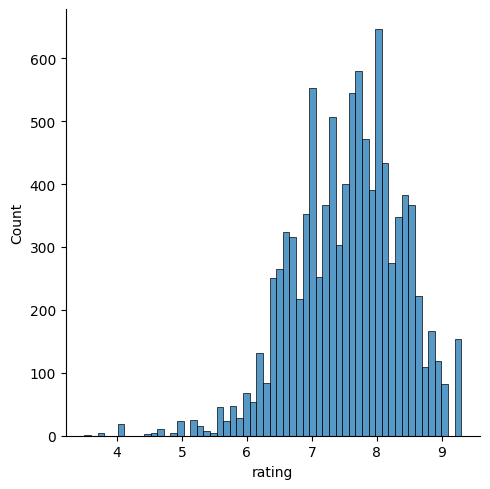

In [71]:
from sentence_transformers import SentenceTransformer
import seaborn as sns
bertmodel = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2') # Choose the sentence transformer, most popular used

# Subset of data for testing implementation:
IMDb_subset = IMDb_dataframe.sample(n=10000, random_state=76)


reviews_embedding = bertmodel.encode(IMDb_subset["review"].tolist()) #Embed the reviews in embedding space


emb = pd.DataFrame(reviews_embedding) # Pandas dataframe of embeddings
emb.index = IMDb_subset.index


emb['rating'] = pd.to_numeric(IMDb_subset['average_rating'], errors='coerce')
sns.displot(emb['rating'], )

In [73]:
from sklearn.model_selection import train_test_split
outp = train_test_split(emb, train_size=0.7)
finaleval=outp[1]
subset=outp[0]

x_subset = subset.drop(columns=["rating"]).to_numpy()
y_subset = subset['rating'].to_numpy()
x_finaleval = finaleval.drop(columns=["rating"]).to_numpy()
y_finaleval = finaleval[['rating']].to_numpy()

In [76]:
import tensorflow as tf
#initialize
neur = tf.keras.models.Sequential()
#layers
neur.add(tf.keras.layers.Dense(units=150, activation='relu'))
neur.add(tf.keras.layers.Dense(units=250, activation='sigmoid'))
neur.add(tf.keras.layers.Dense(units=700, activation='tanh'))

#output layer / no activation for output of regression
neur.add(tf.keras.layers.Dense(units=1, activation=None))

#using mse for regression. Simple and clear
neur.compile(loss='mse', optimizer='adam', metrics=['mse'])

#train
neur.fit(x_subset, y_subset, batch_size=5000, epochs=1000)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 88.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 25.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 95.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 76.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 15.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


2024-12-18 11:50:17.857701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734519017.928999    4602 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734519017.950224    4602 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 11:50:18.004284: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000


2024-12-18 11:50:22.886782: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 59.2304 - mse: 59.2304
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.9710 - mse: 1.9710
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.3178 - mse: 16.3178 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 17.5774 - mse: 17.5774 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.7873 - mse: 5.7873
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8634 - mse: 0.8634
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4.4475 - mse: 4.4475
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 6.9789 - mse: 6.9789
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4.6224 - mse: 4.6224
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.3897 - mse: 1.3897
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.8745 - mse: 0.8745
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.2559 - mse: 2.2559
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [78]:
test_out = neur.predict(x_finaleval)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[8.437455 ],
       [8.47971  ],
       [7.9088798],
       ...,
       [9.3012085],
       [7.833455 ],
       [6.9764504]], shape=(3000, 1), dtype=float32)

In [86]:
from sklearn.preprocessing import MinMaxScaler
output = outp[1][[0]]
scal = MinMaxScaler(feature_range=(1,10))
output['predicted'] = scal.fit_transform(test_out)
output['actual'] = y_finaleval
output['difference'] = abs((output['actual']-output['predicted']))
output = output.drop(columns=[0])
output = pd.merge(output, IMDb_subset[['review']], left_index=True, right_index=True)
output = output.sort_values(['predicted'], ascending=False)
pd.options.display.max_colwidth = 150
output

/tmp/ipykernel_4602/3075877099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['predicted'] = scal.fit_transform(test_out)
/tmp/ipykernel_4602/3075877099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['actual'] = y_finaleval
/tmp/ipykernel_4602/3075877099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,predicted,actual,difference,review
333769,10.000000,6.7,3.300000,"Like some have said before: Great idea, poorly executed. I won't bore you with the details, but it's basically crap and utter waste of any intelli..."
519177,9.854797,8.9,0.954797,Pulp Fiction is undoubtedly a masterpiece. This movie single handedly got me interested in film making and movies themselves. Quentin Tarantino wr...
289888,9.799643,8.2,1.599643,"The movie tells of two people with different personalities, who strive to break the prejudice and become friends.""The world's full of lonely peopl..."
821551,9.746506,9.3,0.446506,Yhe Shawshank Redemption has earned a reputation for being one of the most popular films of all time. Despite an unimpressive performance in the c...
817718,9.657850,9.3,0.357850,'The Shawshank Redemption' is the best film ever made in the history of world cinema! The Best Hollywood Film Of All-Time! A Masterpiece! A cult c...
...,...,...,...,...
272881,2.479794,5.2,2.720206,"Ghost Rider Directed by: Mark Steven Johnson With: Nicholas Cage, Eva Mendes<br/><br/>2005 and 2006 weren't the best years for Nicolas Cage, his f..."
248060,2.177365,4.1,1.922635,"I saw this movie on Netflix a couple days ago, and it was like a 90-92% match in accordance with my viewing habits, so I figured I'd watch it to s..."
246770,2.162171,4.1,1.937829,"For the curious minds wondering how I've seen and reviewed the film already, we are in the US territory of Guam and are one day ahead. I was sever..."
840826,1.917742,5.0,3.082258,"OK, so i was a late bloomer into the book craze, i read the first one about 3 weeks after it came to theaters (i read the book before i saw it), b..."


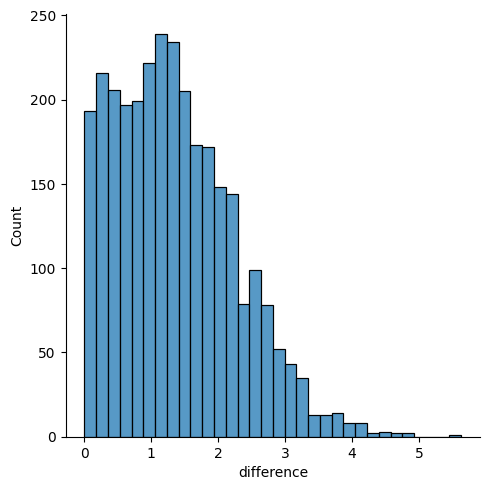

In [87]:
sns.displot(output['difference'] )